1.

Consider the following set of relevance vectors for $Q=4$ image retrieval queries:
$$r_1=(1,0,1,1,1)$$
$$r_2=(0,0,1,1,0)$$
$$r_3=(1,1,1,0,1)$$
$$r_4=(0,0,0,1,1)$$
Compute the mean reciprocal rank and the MAP@5 values. You do not need to generate a final number (the work you'd need a calculator for); just show the final formula.

Note that each query is a class (ie: $r_1$ is trees, $r_2$ is dogs, etc) and each item is 1 if it is the queried image is the correct class and 0 if it is the incorrect class.

Mean Reciprocal Rank:
$$MRR=\frac{1}{Q}\sum_{q=1}^Q\frac{1}{i_q}$$
for $Q$ queries and $i_q$ being the first index that has $r_i=1$

As a result, we have
$$MRR=\frac{1}{4}\left(\frac{1}{1}+\frac{1}{3}+\frac{1}{1}+\frac{1}{4}\right)$$

Mean Average Precision @ 5:

MAP is really stupid. It takes like 10 steps when you could get exact precision values for each query with less steps.
$$\textnormal{Precision}@m=\frac{1}{m}\sum_{j=1}^mr_j$$
$$AP@K=\frac{1}{K}\sum_{i=1}^Kr_i\textnormal{Precision}@i$$
$$MAP@K=\frac{1}{Q}\sum_{q=1}^QAP@K$$
Put it all together:
$$MAP@5=\frac{1}{4}\sum_{q=1}^4\frac{1}{5}\sum_{i=1}^5r_i\frac{1}{i}\sum_{j=1}^ir_j$$


2.

Four challenges of detections are the wide range of sizes of objects in the images, close overlap between objects, a wide range of appearance variation between objects of the same type, and small appearance varations between objects of different types. For each of these, why is it a problem, and how might it be addressed?

Challenge 1: wide range of sizes of objects in the images. This can easily be achieved by resizing the input images (with no change to the classifier).

Challenge 2: close overlap between objects. This occurs when non-maximum suppression falsely merges/suppresses multiple true bounding boxes of overlapping objects. Because the sliding window process generates so many bounding boxes, the refining process is likely to produce multiple bounding boxes for the same object, which requires non-maximum suppression to solve. However, if multiple objects are overlapping, their bounding boxes will look like multiple bounding boxes for the same object. A partial solution involves only suppressing if the objects are of the same class. Another solution involves not fully suppressing boxes: instead assign a confidence score to each box that is decreased on every intersection with another box. However, this method may increase false positives.

Challenge 3: wide range of appearance variations between objects of the same type. The easy solution is subdividing the type (ie: on type "cars", subdivide into "red cars", "grey cars"...). Alternatively, a larger dataset with ample examples of each differing variation of the object will allow the model ample data to train on such a complex class.

Challenge 4: Small appearance variations between objects of different types. I would make the model have attention mechanics to focus on the discriminative features. This would require more data, since we need ample examples of such a subtle discriminating feature.

3.

Calculate the IOU between two bounding rectangles
$$(x_1,y_1,w_1,h_1)=(50,30,20,40)$$
$$(x_2,y_2,w_2,h_2)=(40,30,40,40)$$
where $x_i,y_i$ is the pixel center of the rectangle. Hint: you might find the upper left and lower right corners of each rectangle first.

(assuming up is in the positive $y$ direction and right is in the positive $x$ direction)

Upper left of rectangle 1: $(50-\frac{20}{2},30+\frac{40}{2})=(40,50)$

Lower right of rectangle 1: $(50+\frac{20}{2},30-\frac{40}{2})=(60,10)$

Upper left of rectangle 2: $(40-\frac{40}{2},30+\frac{40}{2})=(20,50)$

Lower right of rectangle 2: $(40+\frac{40}{2},30-\frac{40}{2})=(60,10)$

IOU is intersection over union:
$$IOU(R_1,R_2)=\frac{\textnormal{Area}(R_1\cap R_2)}{\textnormal{Area}(R_1\cup R_2)}$$
Conveniently, the two rectangles have the same lower right corner, and they have the same y-coordinate of their upper left corner.
This means their intersection is the area of rectangle 1 (the smaller rectangle) and their union is the area of rectangle 2 (the larger rectangle). Note that this is only true in this special case (the next formula doesn't always apply).
$$IOU(R_1,R_2)=\frac{\textnormal{Area}(R_1)}{\textnormal{Area}(R_2)}$$
$$IOU(R_1,R_2)=\frac{800}{1600}=0.5$$

4.

You are given a list, $v$, of precision/recall value pairs, i.e. for each $i$, $v[i][0]$ is a precision value and $[i][1]$ is the associated recall value. Write a section of code that computes the approximate area under the monotomic (i.e. "wiggles" eliminated) precision-recall curve, by evaluating the curve at 101 recall values: 0, 0.01, 0.02, ..., 0.99, 1.00.

In [ ]:
import numpy as np
import random

# Script from chatgpt that randomly generates v
def generate_precision_recall_pairs(n=20):
    """Generates a list of n precision-recall pairs."""
    recall_values = sorted(random.random() for _ in range(n))  # Ensure recall is increasing
    precision_values = [random.random() for _ in range(n)]
    
    return list(zip(precision_values, recall_values))

# Generate a sample list
v = generate_precision_recall_pairs()

# Now that we have v, we can start the problem
# Sort by recall from lowest to highest
v.sort(key=lambda x: x[1])

# Note that the Precision-Recall curve might not be monotonic
# We solve this in the following way
# At each discrete sample of recall replace precision with the max precision at this and all greater recall values

# Create an array of recall values from 1.00 to 0.00 (inclusive)
recall_samples = np.arange(1.00, -0.01, -0.01)  # Decreasing from 1.00 to 0.00

# Compute the max precision for each recall level
max_precision = 0
total_area = 0

for recall_level in recall_samples:
    # Find all precision values where recall is at least recall_level
    # Not sure if there's a way to do this without for loops
    relevant_precisions = [p for p, r in v if r >= recall_level]
    
    # If there are any, update max_precision
    if relevant_precisions:
        max_precision = max(relevant_precisions)
    
    # Add the Riemann-sum thingy to the total area
    total_area+=0.01*max_precision

print(total_area)

0.8697492449371677


5.

Suppose you are given a set of $N$ ground-truth bounding boxes stored in a $N\times4$ NumPy array $B$ where $B[:,0]$ and $B[:,1]$ contain the $x$ and $y$ values of the centers and $B[:,2]$ and $B[:,3]$ contain the widths and heights of the ground truth bounding boxes. Sketch a procedure where you might use k-means clustering to group the bounding boxes to form the set of anchor boxes. Hint: not all values of the bounding boxes matter. Note that there is no "right" answer here. How might you take into consideration the wide range of sizes of the ground truth bounding boxes?

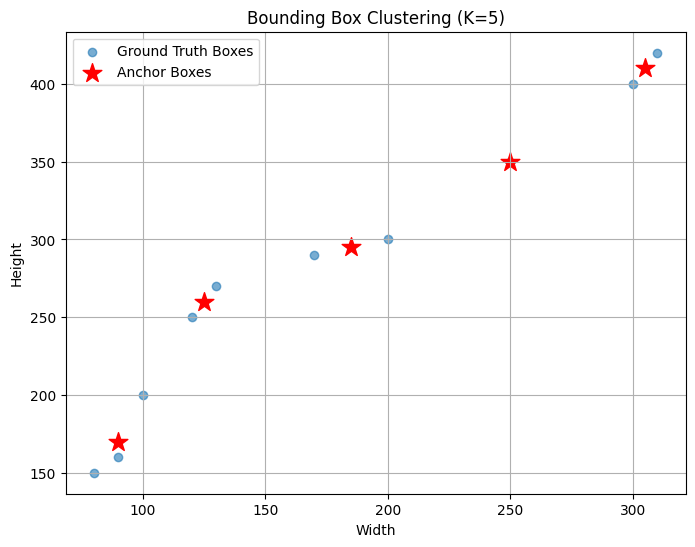

Anchor Boxes:
 [[250. 350.]
 [ 90. 170.]
 [125. 260.]
 [305. 410.]
 [185. 295.]]
Average IoU Score: 0.9072482022451271


In [ ]:
"""
Note that this part doesn't technically need a code section, this was just the easiest way to draw/visualize what this problem wants
All of this code is unmodified from chatgpt.
It also looks like all this problem wants is to cluster the bounding boxes by size? I thought it might want to cluster them by location as well...
"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def iou(box, clusters):
    """ Compute IoU between a box and each cluster center. """
    x = np.minimum(box[0], clusters[:, 0])
    y = np.minimum(box[1], clusters[:, 1])
    intersection = x * y
    box_area = box[0] * box[1]
    cluster_area = clusters[:, 0] * clusters[:, 1]
    iou_vals = intersection / (box_area + cluster_area - intersection)
    return iou_vals

def avg_iou(boxes, clusters):
    """ Compute average IoU for all boxes and clusters. """
    return np.mean([np.max(iou(box, clusters)) for box in boxes])

def kmeans_iou(boxes, k, max_iter=300):
    """ Perform K-Means clustering using IoU-based distance. """
    kmeans = KMeans(n_clusters=k, random_state=0, max_iter=max_iter, n_init=10)
    kmeans.fit(boxes)
    return kmeans.cluster_centers_, avg_iou(boxes, kmeans.cluster_centers_)

# Example: Ground-truth bounding boxes (width, height)
gt_boxes = np.array([
    [100, 200], [120, 250], [300, 400], [80, 150], [200, 300], 
    [250, 350], [130, 270], [90, 160], [170, 290], [310, 420]
])

# Choose number of clusters (K)
K = 5  

# Run K-Means clustering
anchor_boxes, avg_iou_score = kmeans_iou(gt_boxes, K)

# Plot results
plt.figure(figsize=(8, 6))
plt.scatter(gt_boxes[:, 0], gt_boxes[:, 1], label="Ground Truth Boxes", alpha=0.6)
plt.scatter(anchor_boxes[:, 0], anchor_boxes[:, 1], marker='*', s=200, color='red', label="Anchor Boxes")

plt.xlabel("Width")
plt.ylabel("Height")
plt.title(f"Bounding Box Clustering (K={K})")
plt.legend()
plt.grid(True)
plt.show()

print("Anchor Boxes:\n", anchor_boxes)
print("Average IoU Score:", avg_iou_score)


6. Non-maximum suppression of detection predictions can cause objects to be missed when they are quite close to (partially occluded by) more prominent (foreground) objects. One idea for tyring to handle this is change the NMS criteria to the following. Prediction $i$ is suppressed by $j$ if

• $i$ and $j$ predict the same class, and

• for activations $a_i$ and $a_j$ we have $a_i<p(\textnormal{IOU}(i,j))a_j$

Here, the function $p(\cdot)$ maps the IOU to the fraction of $a_j$ that $a_i$ must be above in order to survive. For example if we have
$$p(u)=\begin{cases}
1&\textnormal{if } u>0.5\\
0&\textnormal{otherwise,}
\end{cases}$$
then we have the original NMS criteria. More sophisticated, we might have
$$p(u)=\begin{cases}
1&\textnormal{if }u>u_1\\
(u-u_0)/(u_1-u_0)&\textnormal{if }u_0\le u\le u_1\\
0&\textnormal{otherwise,}
\end{cases}$$
for tunable paramters $u_0$ and $u_1$, where $0\le u_0\le u_1\le1$ Again, note that if $u_0=u_1=0.5$ we are back to the original NMS criteria.

(a) Write code to implement the function $p$ and then the overall NMS procedure.

(b) How well might this algorithm work? What are the risks?

In [ ]:
def p(u,u0,u1):
    if u>u1: return 1
    if u>=u0 and u<=u1: return (u-u0)/(u1-u0)
    return 0

# Not sure how much of non-maximum suppression we are supposed to write
# Are we supposed to write the IOU function from scratch?

# This is just pseudocode, and isn't really meant to run
for i in predictions:
    for j in predictions:
        if i.class==j.class and a[i]<p(IOU(i,j),u0,u1)*a[j]:
            suppress(i)

This algorithm treats any IOU > $u_1$ the exact same as normal non-maximum suppression. However, it provides only partial suppression to IOU values between $u_0$ and $u_1$. As a result, strong activations can potentially overcome overlaps.

This may increase the number of overlapping objects to be identified. However, it also risks identifying false positives. Ie: it may identify multiple bounding boxes around the same object if their activations are strong enough.

7.

The output of the 2nd stage of RCNN before post-processing is a series of region predictions, each having the bounding boxes (mapped back to the image coordinate system), class label, and class activations. Given a list of ground truth class labels and their associated bounding boxes (in image coordinates) and given an IOU threshold, write code to select the top 100 "hard negatives" that don't overlap a ground truth detection (of the same class) more than the threshold. Should this threshold be greater or less than 0.5? Why?

The threshold should be less than 0.5. A threshold of more than 0.5 can result in hard negatives that have IOU values of 0.4 with a ground truth, which is still pretty close. We want our "hard negatives" to be "hard," which means we want them all to have as little overlap with ground truths as possible.

In [ ]:
bounding_boxes = [] #supposed to contain a bunch of bounding boxes, but I'm too lazy
ground_truths = [] #supposed to contain a bunch of ground truths, but I'm too lazy
hard_negatives = []
for bounding_box in bounding_boxes:
    meets_threshold=False
    for ground_truth in ground_truth:
        if bounding_box.class != ground_truth.class: continue
        if IOU(bounding_box,ground_truth)>threshold: meets_threshold=True

    if meets_threshold:
        hard_negatives.append(bounding_box)
    if len(hard_negatives>=100):
        break